In [1]:
import os,sys
import scanpy as sc
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from mebocost import mebocost



## MEBOCOST for predicting metabolite-based cell-cell communications
<p> In this tutorial, we apply MEBOCOST on a demo dataset which 200 cells were sampled from a HNSC scRNA-seq data (GSE103322).
    
Note: since this demo data was down-sampled from original scRNA-seq, the predicted result of communication might looks not biologically meaningful. The goal of this notebook is to show the step-by-step analysis</p>

### 1. Read scRNA-seq expression data
<p> Either by adata scanpy object (reccomended), or by python pandas data frame</p>

In [2]:
adata = sc.read_h5ad('./data/demo/raw_scRNA/demo_HNSC_200cell.h5ad')

### if you want to pass expression matrix and cell_annotation separately from adata, you can get exp_mat and cell_ann:
### then pass to mebocost
# exp_mat = pd.DataFrame(adata.X, columns = adata.var_names, index = adata.obs_names).T
# cell_ann = adata.obs


<p>Note: users can also provide exp_mat (scRNA-seq gene-by-cell expression matrix) and cell_ann (cell-by-annoatation matrix) separately. Users can read expression and meta data from external files such as .csv, .tsv, and .txt files. Please refer to pandas read_csv functions to read those files (<a href=https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html>read_csv</a>) and pass to mebocost. This would be very useful when users want to use expression data and meta data from Seurat which is typically in R. In this case, users can first write out expression matrix and meta data (cell annotation) from Seurat in R. Once the expression and meta data were saved in your local, those files can be read into Python by pandas and then pass to mebocost as the instructions in following.</p>



### 2. Infer metabolic communications 

In [3]:
## initiate the mebocost object
### 1. pass expression data by scanpy adata object
mebo_obj = mebocost.create_obj(
                        adata = adata,
                        group_col = ['celltype'],
                        met_est = 'mebocost',
                        config_path = './mebocost.conf',
                        exp_mat=None,
                        cell_ann=None,
                        species='human',
                        met_pred=None,
                        met_enzyme=None,
                        met_sensor=None,
                        met_ann=None,
                        scFEA_ann=None,
                        compass_met_ann=None,
                        compass_rxn_ann=None,
                        gene_network=None,
                        gmt_path=None,
                        cutoff_exp=0,
                        cutoff_met=0,
                        cutoff_prop=0.25,
                        sensor_type=['Receptor', 'Transporter', 'Nuclear Receptor'],
                        thread=8
                        )

### 2. pass expression data and cell annotation table by pandas data frame
### taking exp_mat and cell_all from the above 
### read expression data from a external file
# exp_mat = pd.read_csv(your_exp_data_file)
# cell_ann = pd.read_csv(your_cell_ann_data_file)

# mebo_obj = mebocost.create_obj(
#                         adata = None,
#                         group_col = ['celltype'],
#                         met_est = 'mebocost',
#                         config_path = './mebocost.conf',
#                         exp_mat=exp_mat,
#                         cell_ann=cell_ann,
#                         species='human',
#                         met_pred=None,
#                         met_enzyme=None,
#                         met_sensor=None,
#                         met_ann=None,
#                         scFEA_ann=None,
#                         compass_met_ann=None,
#                         compass_rxn_ann=None,
#                         gene_network=None,
#                         gmt_path=None,
#                         cutoff_exp=0,
#                         cutoff_met=0,
#                         cutoff_prop=0.25,
#                         sensor_type=['Receptor', 'Transporter', 'Nuclear Receptor'],
#                         thread=8
#                         )



[June 01, 2022 12:46:48]: We get expression data with 18241 genes and 200 cells.
[June 01, 2022 12:46:48]: Data Preparation Done in 0.0678 seconds


#### 2.1 Estimate metabolite abundance [Optional]
<li> Note: this estimation have been already incoperated in mebo_obj.infer_commu, so only do step 2.1 if you just want to estimate metabolite level and stop from doing further analysis, such as communication prediction. Since config loading and estimator functions has been incoperated in communication prediction function, there is no need to do separately if you plan to run communication prediction module.</li>

In [4]:
## 【optional】only estimate metabolite abundance for cells using expression data
## this estimation actually included in infer_commu function, if you want 
## two steps include loading config and running estimator
mebo_obj._load_config_()
mebo_obj.estimator()


[June 01, 2022 12:46:48]: Load config and read data based on given species [human].
[June 01, 2022 12:46:50]: Estimtate metabolite level using mebocost


In [5]:
## check the metabolite estimation result
met_mat = pd.DataFrame(mebo_obj.met_mat.toarray(),
                      index = mebo_obj.met_mat_indexer,
                      columns = mebo_obj.met_mat_columns)
## print head
met_mat.head()


HNSCC5_p14_HNSCC5_P14_LN_H02  HNSCC_17_P10_C11_S227_comb  \
HMDB0003450                      0.000000                    0.000000   
HMDB0003948                      0.255695                    0.303540   
HMDB0003712                      0.204556                    0.242832   
HMDB0003945                      0.227284                    0.366798   
HMDB0003949                      0.255695                    0.303540   

             HNSCC6_p15_HNSCC6_P15_LN_D05  HNSCC25_P2_A10_S10_comb  \
HMDB0003450                      0.000000                 0.000000   
HMDB0003948                      0.267465                 0.000000   
HMDB0003712                      0.302952                 0.000000   
HMDB0003945                      0.383685                 0.222933   
HMDB0003949                      0.267465                 0.000000   

             HNSCC16_P4_HNSCC16_P4_B11  HNSCC18_P7_F06_S162_comb  \
HMDB0003450                   0.000000                  0.000000   
HMDB0003948                   0.413994                  0.146958   
HMDB0003712                   0.331195                  0.117567   
HMDB0003945                   0.447552                  0.441383   
HMDB0003949                   0.413994                  0.146958   

             HNSCC25_P4_E04_S244_comb  HNSCC20_P5_pri_A01_S1_comb  \
HMDB0003450                       0.0                    0.000000   
HMDB0003948                       0.0                    0.327930   
HMDB0003712                       0.0                    0.342155   
HMDB0003945                       0.0                    0.480210   
HMDB0003949                       0.0                    0.327930   

             HN28_P5_F10_S262_comb  HNSCC17_P13_E12_S348_comb  ...  \
HMDB0003450               0.000000                   0.000000  ...   
HMDB0003948               0.210271                   0.000835  ...   
HMDB0003712               0.235718                   0.297141  ...   
HMDB0003945               0.296026                   0.000742  ...   
HMDB0003949               0.210271                   0.000835  ...   

             HNSCC6_p16_HNSCC6_P16_B03  HNSCC8_1ant_HNSCC8_1ant_A06  \
HMDB0003450                   0.000000                     0.000000   
HMDB0003948                   0.225085                     0.183810   
HMDB0003712                   0.180068                     0.147048   
HMDB0003945                   0.200076                     0.163386   
HMDB0003949                   0.225085                     0.183810   

             HNSCC26_P24_H06_S378_comb  HNSCC16_P2_F09_S69_comb  \
HMDB0003450                   0.000000                 0.000000   
HMDB0003948                   0.359314                 0.002629   
HMDB0003712                   0.473624                 0.226876   
HMDB0003945                   0.319390                 0.249946   
HMDB0003949                   0.359314                 0.002629   

             HNSCC6_p14_hnscc6_p14_D12  HNSCC18_P2_F02_S158_comb  \
HMDB0003450                   0.000000                  0.000000   
HMDB0003948                   0.433498                  0.413497   
HMDB0003712                   0.421987                  0.330798   
HMDB0003945                   0.539379                  0.367553   
HMDB0003949                   0.433498                  0.413497   

             HNSCC16_P12_HNSCC16_P12_G10  HNSCC16_P14_HNSCC16_P14_H10  \
HMDB0003450                     0.000000                     0.000000   
HMDB0003948                     0.001104                     0.004354   
HMDB0003712                     0.000883                     0.003483   
HMDB0003945                     0.328898                     0.003870   
HMDB0003949                     0.001104                     0.004354   

             HNSCC6_p16_HNSCC6_P16_E07  HNSCC28_P13_A12_S204_comb  
HMDB0003450                   0.000000                   0.000000  
HMDB0003948                   0.202068                   0.313849  
HMDB0003712               

### 2.2 communication inference

In [6]:
## metabolic communication inference
## Note: by default, this function include estimator for metabolite abundance
commu_res = mebo_obj.infer_commu(
                                n_shuffle=1000,
                                seed=12345, 
                                Return=True, 
                                thread=None,
                                save_permuation=False,
                                min_cell_number = 1
                            )


### 2.3 save mebocost object and reload object
#### MEBOCOST object can be saved as a pickle file which is a python-based file format using less disk space
##### save

In [7]:
# ### save 
# mebocost.save_obj(obj = mebo_obj, path = './data/demo/demo_HNSC_200cell_commu.pk')


##### reload

In [8]:
## re-load the previous object if needed
mebo_obj = mebocost.load_obj('./data/demo/demo_HNSC_200cell_commu.pk')


[June 01, 2022 12:47:02]: Data Preparation Done in 0.0063 seconds


### 2.4 Change parameters for previous object

##### change or revise config file
<p>If you changed the workspace compared to the one where you generated this object, or you want to change configure files (mebocost.conf), you may want to reset the path of the configure file, you can check the path of configure file in the current re-loaded object by:</p>

In [9]:
### If you changed the workspace compared to the one where you generated this object, 
### or you want to change configure files (mebocost.conf),
### you may want to reset the path of the configure file, 
### you can check the path of configure file in the current re-loaded object by:
print('config file path in the object:', mebo_obj.config_path)

#### if you do need to change, revise the mebocost.conf file first. 
### If done, pass the path to mebocost:

mebo_obj.config_path = './mebocost.conf'

#### then, re-load config files

mebo_obj._load_config_()

#### check if path is right or not, for example:

print('Now gmt file path:', mebo_obj.gmt_path)


config file path in the object: ./mebocost.conf
[June 01, 2022 12:47:02]: Load config and read data based on given species [human].
Now gmt file path: /Users/rongbinzheng/Documents/test/MEBOCOST/data/mebocost_db/human/KEGG/human_KEGG_terms_symbol.gmt


#### change parameters such as cutoff of sensor expression and metabolite abundance [Optional]

In [10]:

## if users want to adjust some parameters regarding cutoff of expression 
## and proportion of cells expressed to focus on highly confident ones,

## we save the original result in variable of original_result, 
## so additional filtering can be done on this data frame

## the cutoff of sensor expression and metabolite abundance 
## should really dependent onusers dataset

## exp_prop and met_prop have been saved in the mebocost object, 
## you can retreve by mebo_obj.exp_prop and mebo_obj.met_prop
## you also can re-calculate by changing the cutoff:

exp_prop, met_prop = mebo_obj._check_aboundance_(cutoff_exp = 0.1,
                                                   cutoff_met = 0.1)


## you can pass the exp_prop and met_prop to the function and 
## filter out bad communications under the cutoff
## here is the example to use newly calculated exp_prop and met_prop
## if you want to use previously calculated in mebocost object, 
## you can replace met_prop by mebo_obj.met_prop, same for exp_prop
## cutoff_prop here means the faction of cells in the cell group expressing the senser
## or having the abundant of metabolite
commu_res_new = mebo_obj._filter_lowly_aboundant_(pvalue_res = mebo_obj.original_result.copy(),
                                                    cutoff_prop = 0.25,
                                                    met_prop=met_prop,
                                                    exp_prop=exp_prop,
                                                    min_cell_number = 1
                                                 )
## update your commu_res in mebocost object, 
## so that the object can used to generate figure based on the updated data
mebo_obj.commu_res = commu_res_new.copy()

## change such parameters to focus on highly confident communications would be very helpfull,
## if there is a big number of communications happened in your data 


[June 01, 2022 12:47:05]: Calculating aboundance of metabolite and sensor expression in cell groups
[June 01, 2022 12:47:05]: cutoff_exp: 0.1
[June 01, 2022 12:47:05]: cutoff_metabolite: 0.1
[June 01, 2022 12:47:07]: Set p value and fdr to 1 if sensor or metaboltie expressed cell proportion less than 0.25


### 2.5 Visualize result of MEBOCOST prediction

#### 2.5.1 summary of the number of communication events

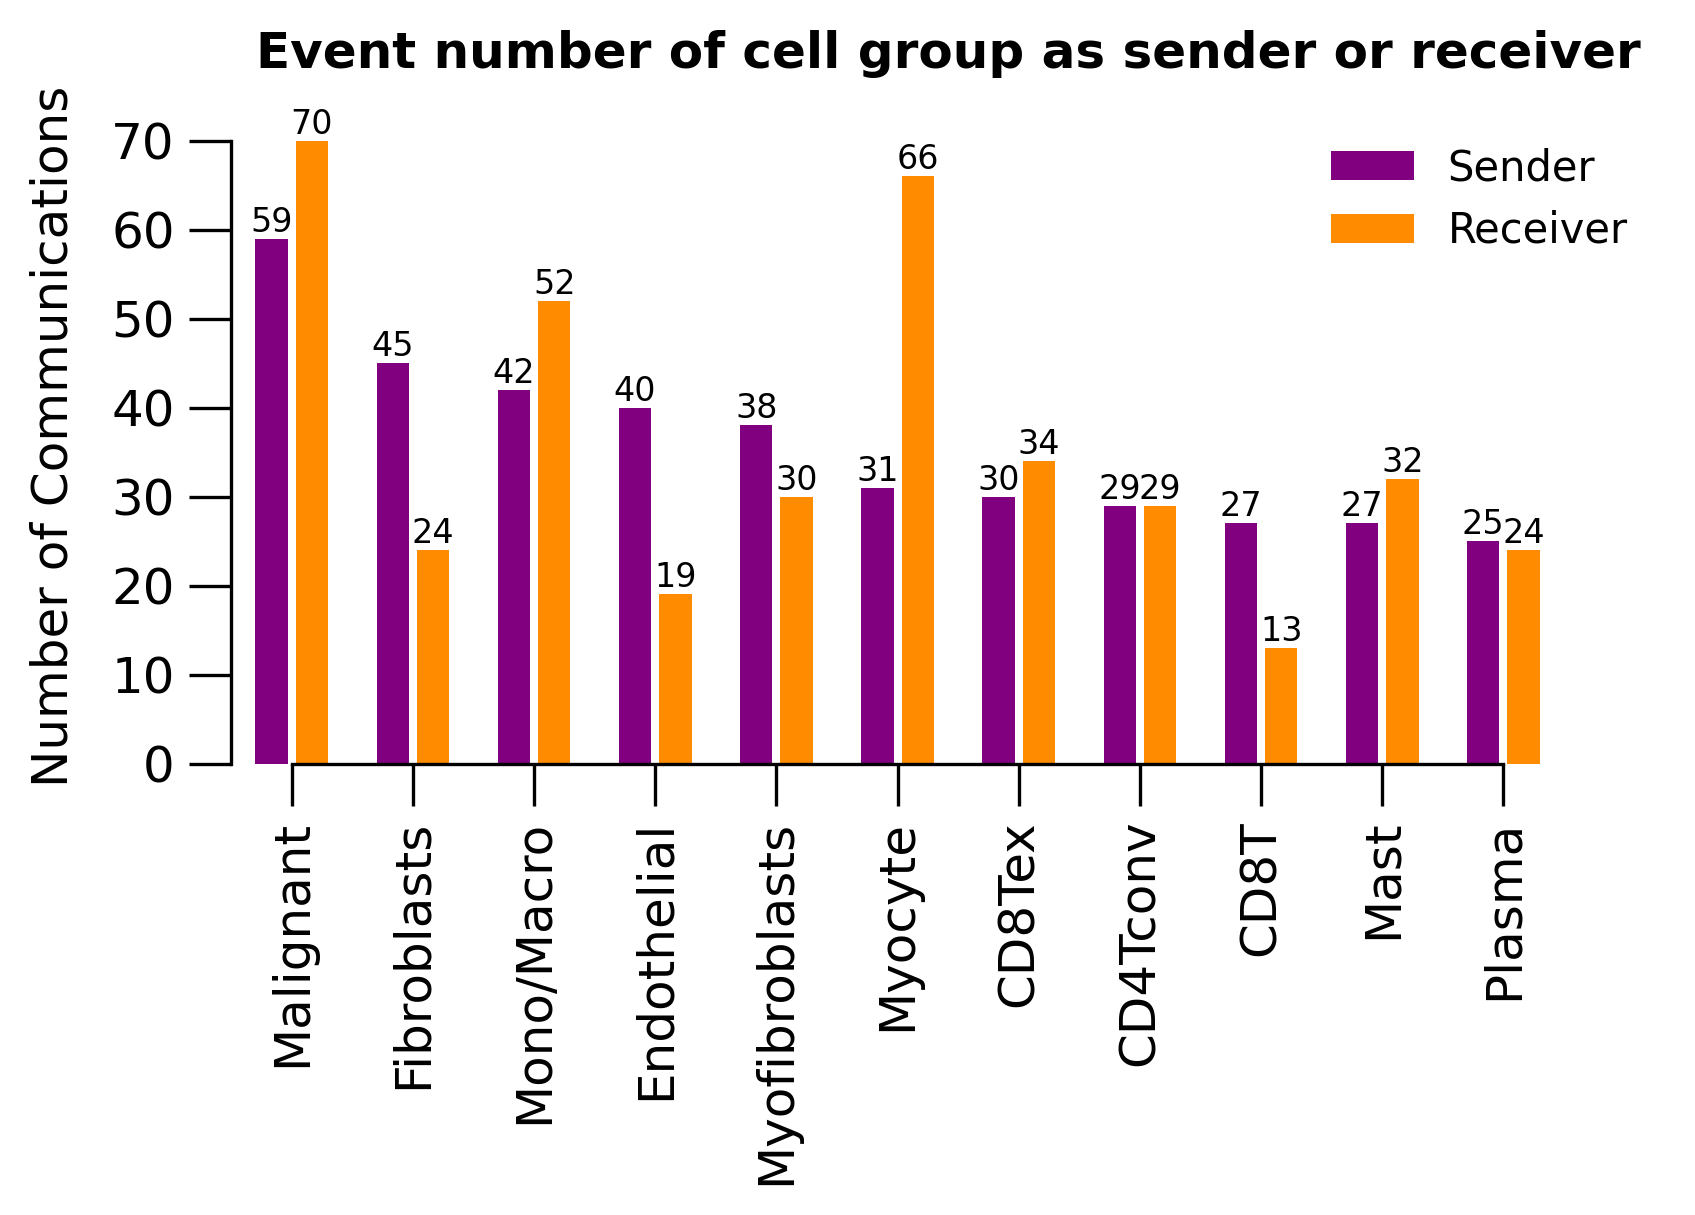

In [11]:
## sender and receiver event number
mebo_obj.eventnum_bar(
                    sender_focus=[],
                    metabolite_focus=[],
                    sensor_focus=[],
                    receiver_focus=[],
                    and_or='and',
                    pval_method='permutation_test_fdr',
                    pval_cutoff=0.05,
                    comm_score_col='Commu_Score',
                    comm_score_cutoff = 0.1,
                    cutoff_prop = 0.25,
                    figsize='auto',
                    save=None,
                    show_plot=True,
                    include=['sender-receiver'],
                    group_by_cell=True,
                    colorcmap='tab20',
                    return_fig=False
                )



#### 2.5.2 summay of communication in cell-to-cell network

[June 01, 2022 12:47:07]: show communication in cells by network plot


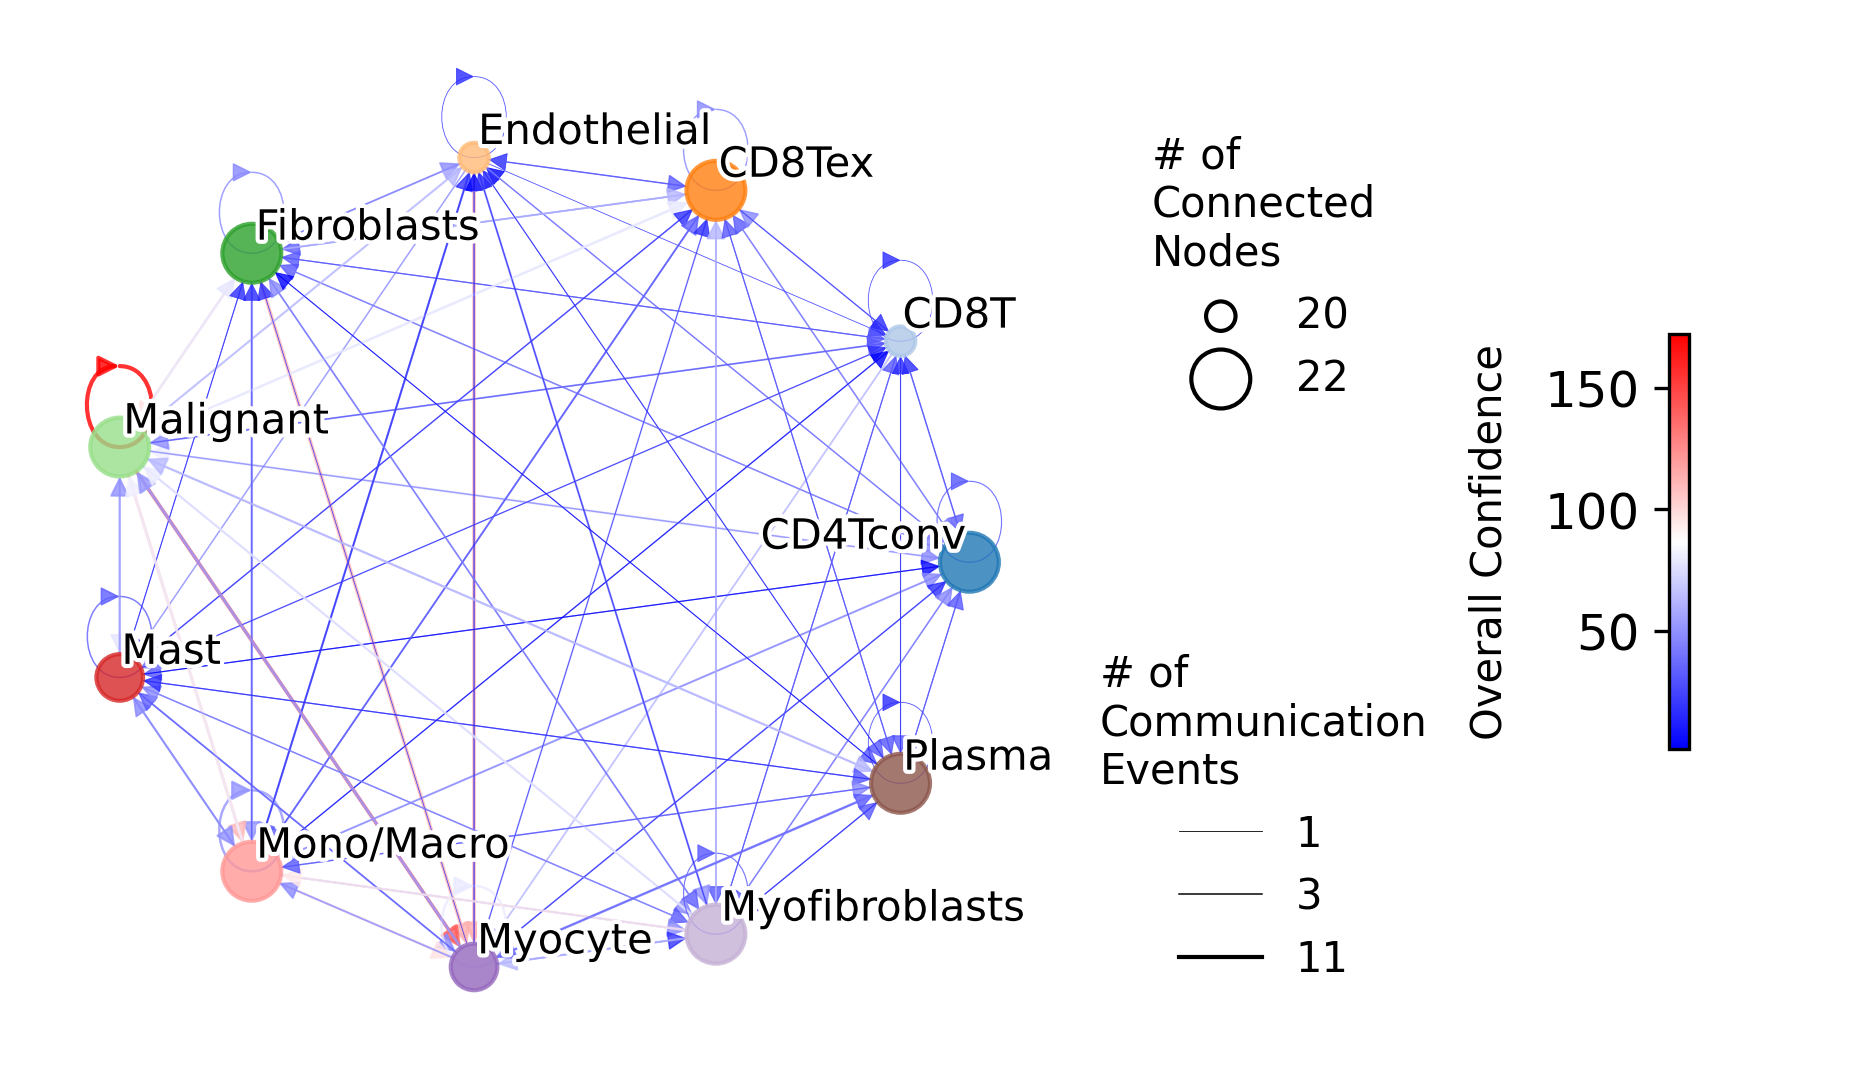

In [12]:
## circle plot to show communications between cell groups
mebo_obj.commu_network_plot(
                    sender_focus=[],
                    metabolite_focus=[],
                    sensor_focus=[],
                    receiver_focus=[],
                    and_or='and',
                    pval_method='permutation_test_fdr',
                    pval_cutoff=0.05,
                    node_cmap='tab20',
                    figsize=(6.1, 3.5),
                    line_cmap='bwr',
                    line_color_vmin=None,
                    line_color_vmax=None,
                    linewidth_norm=(0.2, 1),
                    node_size_norm=(50, 200),
                    adjust_text_pos_node=True,
                    node_text_hidden = False,
                    node_text_font=10,
                    save=None,
                    show_plot=True,
                    comm_score_col='Commu_Score',
                    comm_score_cutoff=0.1,
                    text_outline=True,
                    return_fig=False
                )





#### 2.5.3 Showing the communication between sender and receiver in a dot plot

[June 01, 2022 12:47:09]: plot dot plot to show communication in cell type level


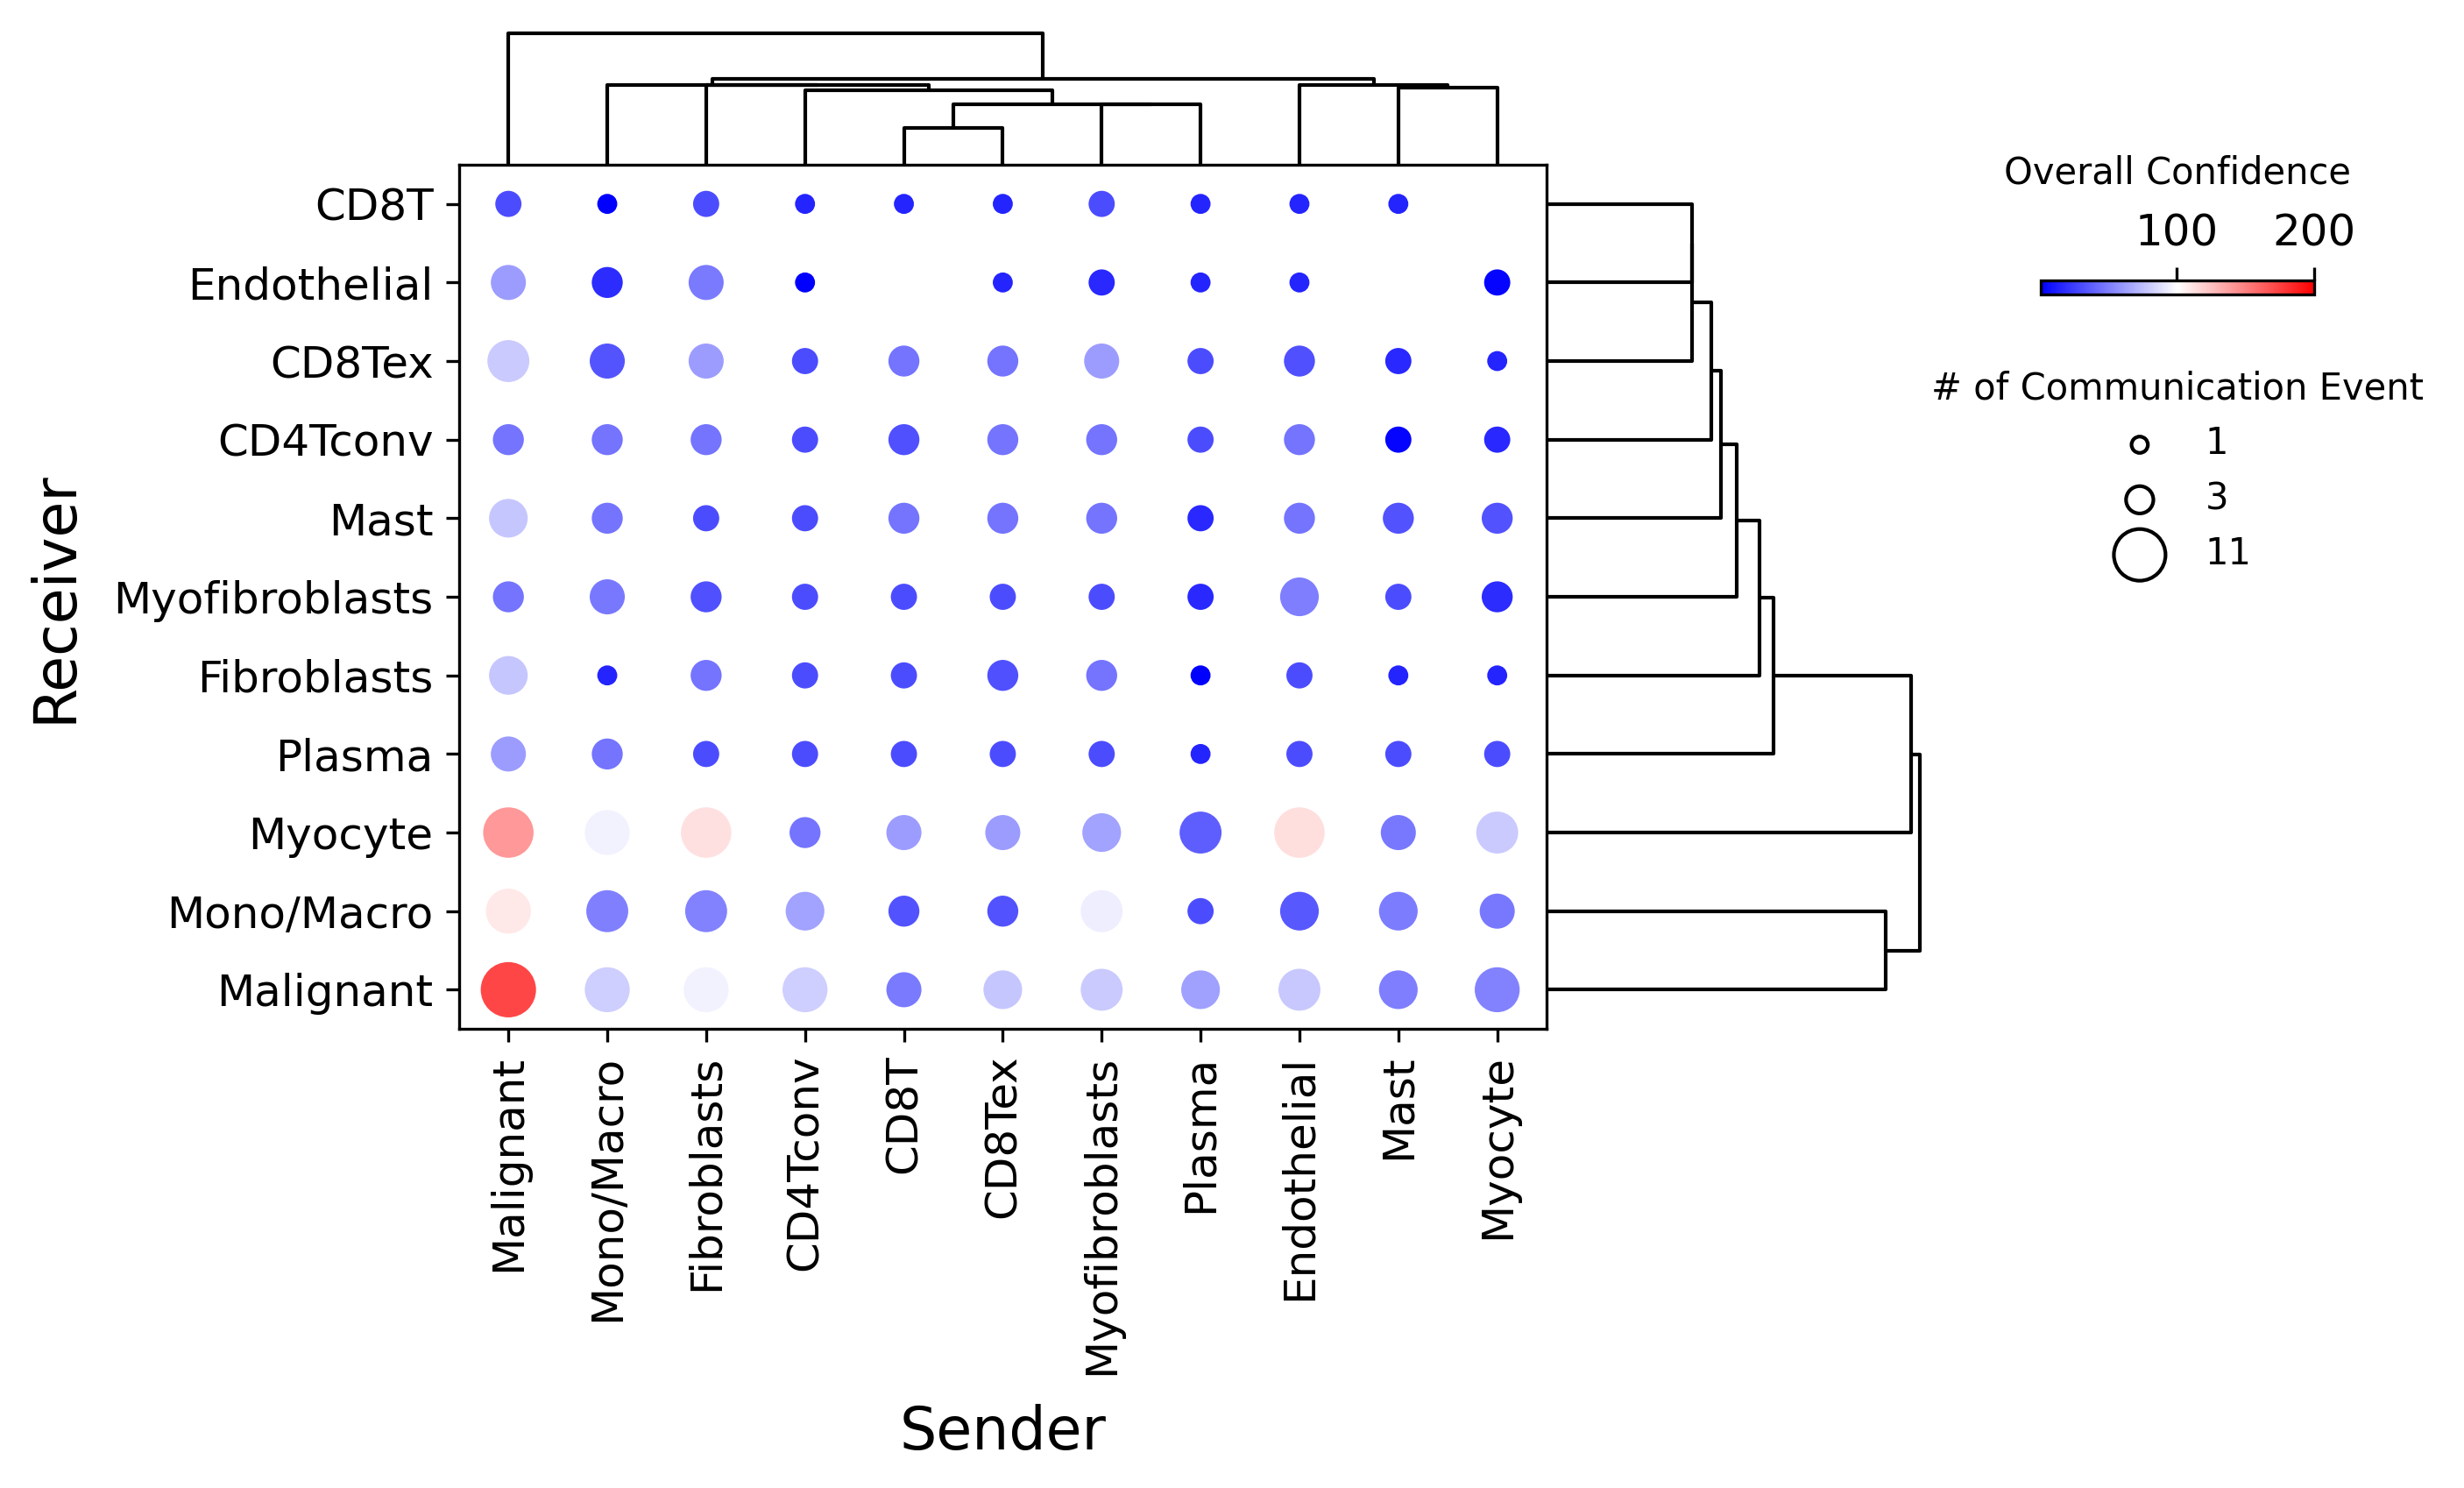

In [13]:
### dot plot to show the number of communications between cells

mebo_obj.count_dot_plot(
                        pval_method='permutation_test_fdr',
                        pval_cutoff=0.05,
                        cmap='bwr',
                        figsize='auto',
                        save=None,
                        dot_size_norm=(20, 200),
                        dot_color_vmin=None,
                        dot_color_vmax=200,
                        show_plot=True,
                        comm_score_col='Commu_Score',
                        comm_score_cutoff=0.1,
                        return_fig = False
                    )



#### 2.5.4 Showing the detailed communications (sender-receiver vs metabolite-sensor) in a dot map

[June 01, 2022 12:47:11]: plot heatmap for significant result


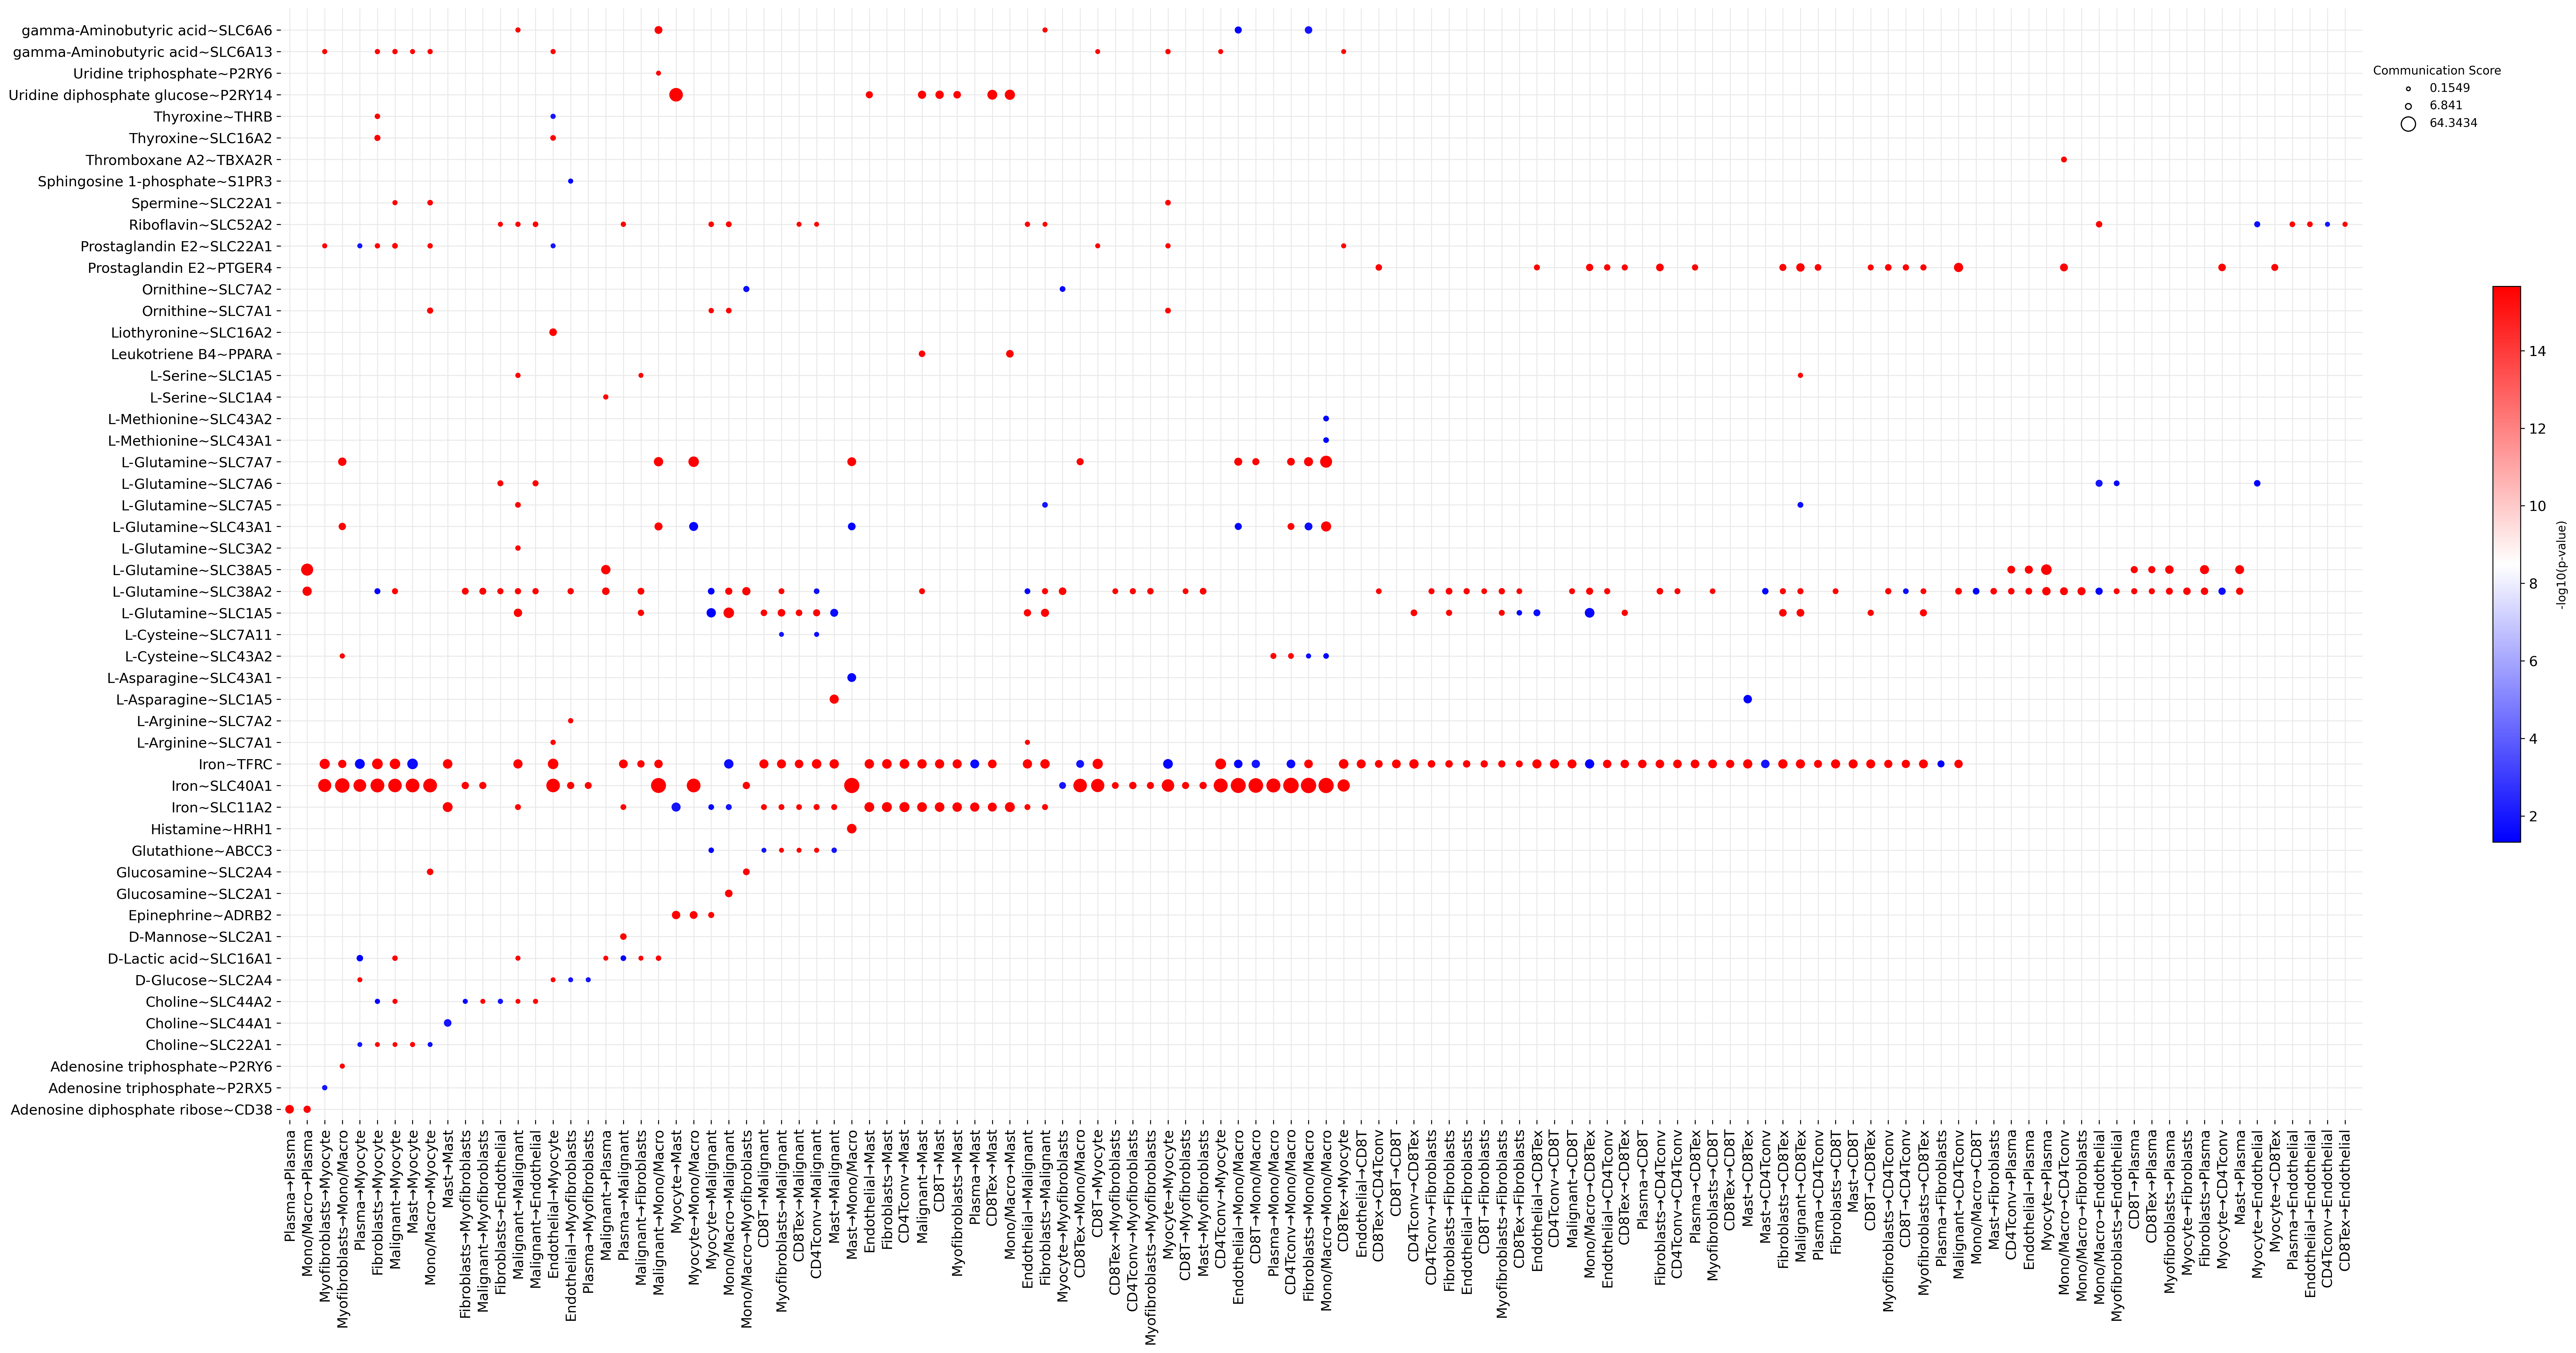

In [14]:
mebo_obj.commu_dotmap(
                sender_focus=[],
                metabolite_focus=[],
                sensor_focus=[],
                receiver_focus=[],
                and_or='and',
                pval_method='permutation_test_fdr',
                pval_cutoff=0.05,
                figsize='auto',
                cmap='bwr',
                node_size_norm=(10, 150),
                save=None,
                show_plot=True,
                comm_score_col='Commu_Score',
                comm_score_cutoff=0.1,
                swap_axis = False,
                return_fig = False
                )


#### 2.5.5 Visualization of the communication flow from sender metabolite to sensor in receiver

[June 01, 2022 12:47:17]: plot flow plot to show the communications from Sender -> Metabolite -> Sensor -> Receiver


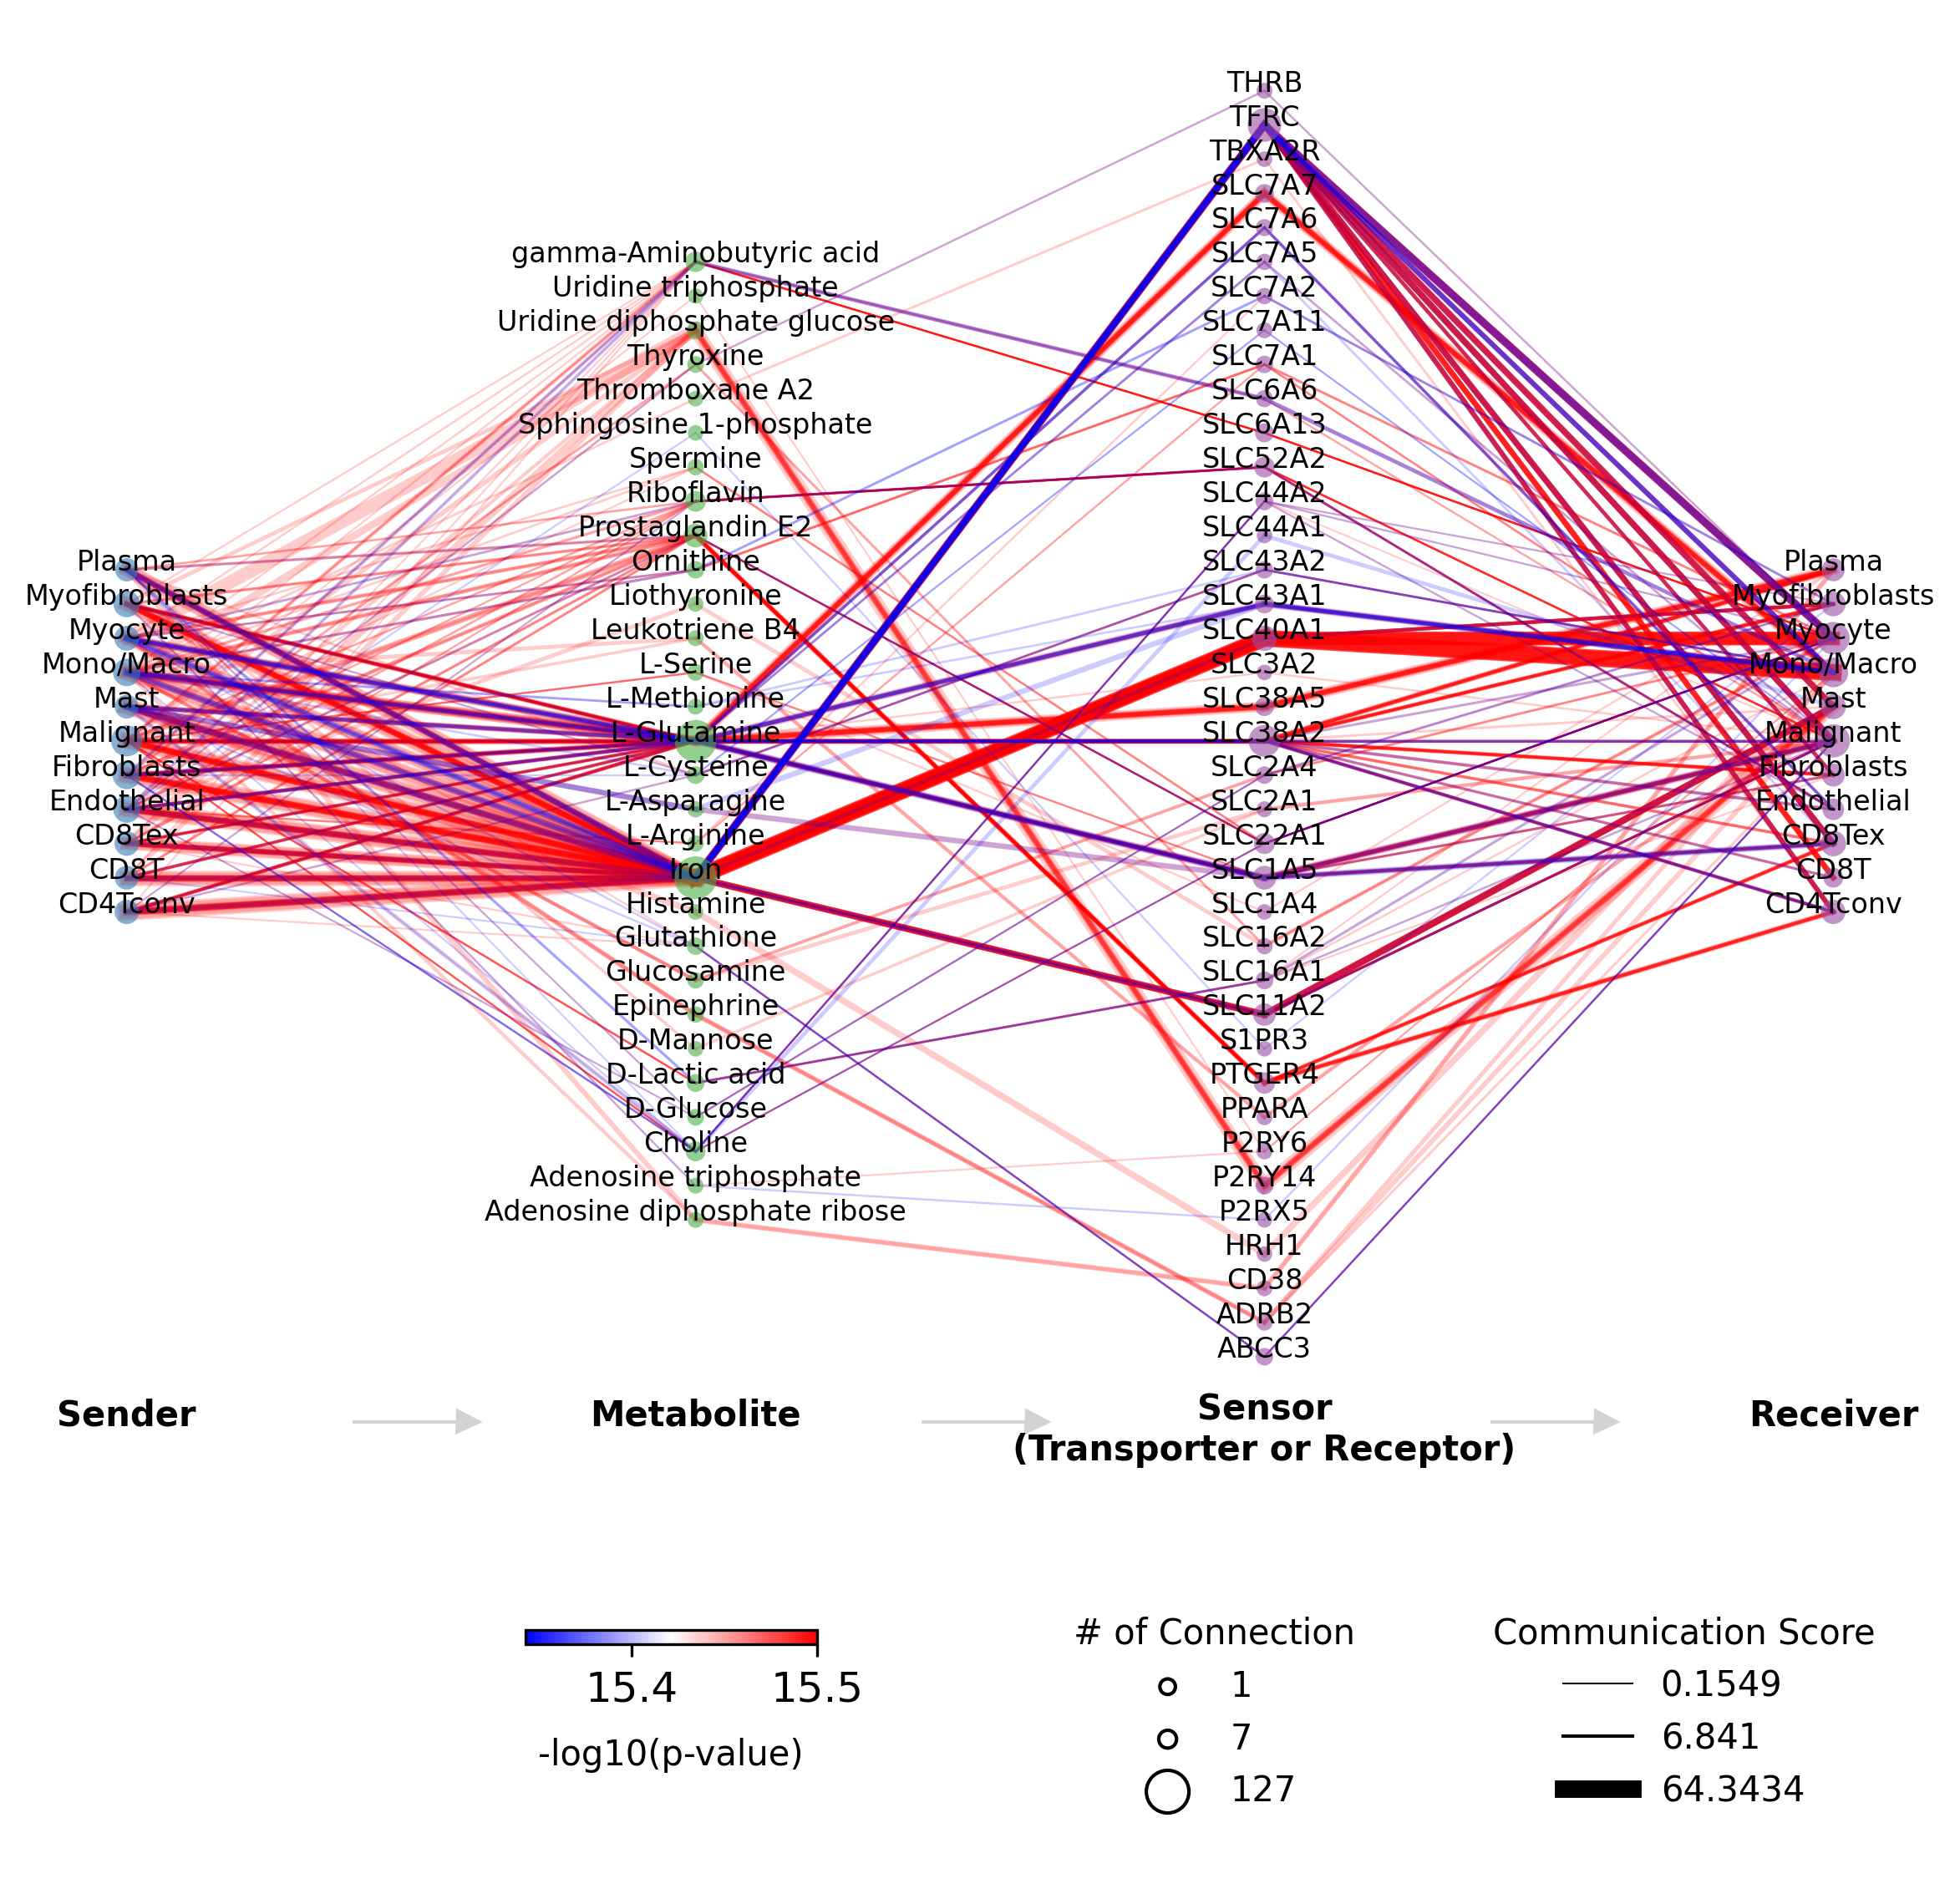

In [15]:
mebo_obj.FlowPlot(
                pval_method='permutation_test_fdr',
                pval_cutoff=0.05,
                sender_focus=[],
                metabolite_focus=[],
                sensor_focus=[],
                receiver_focus=[],
                remove_unrelevant = False,
                and_or='and',
                node_label_size=8,
                node_alpha=0.6,
                figsize='auto',
                node_cmap='Set1',
                line_cmap='bwr',
                line_vmin = None,
                line_vmax = 15.5,
                node_size_norm=(20, 150),
                linewidth_norm=(0.5, 5),
                save=None,
                show_plot=True,
                comm_score_col='Commu_Score',
                comm_score_cutoff=0.1,
                text_outline=False,
                return_fig = False
            )


#### 2.5.6 Visualization of the metabolite level or sensor expression in cell groups


[June 01, 2022 12:47:20]: Warnings: no sensors to plot
[June 01, 2022 12:47:20]: Find metabolites ['D-Lactic acid', 'Iron', 'Prostaglandin E2', 'gamma-Aminobutyric acid', 'L-Glutamine'] to plot violin


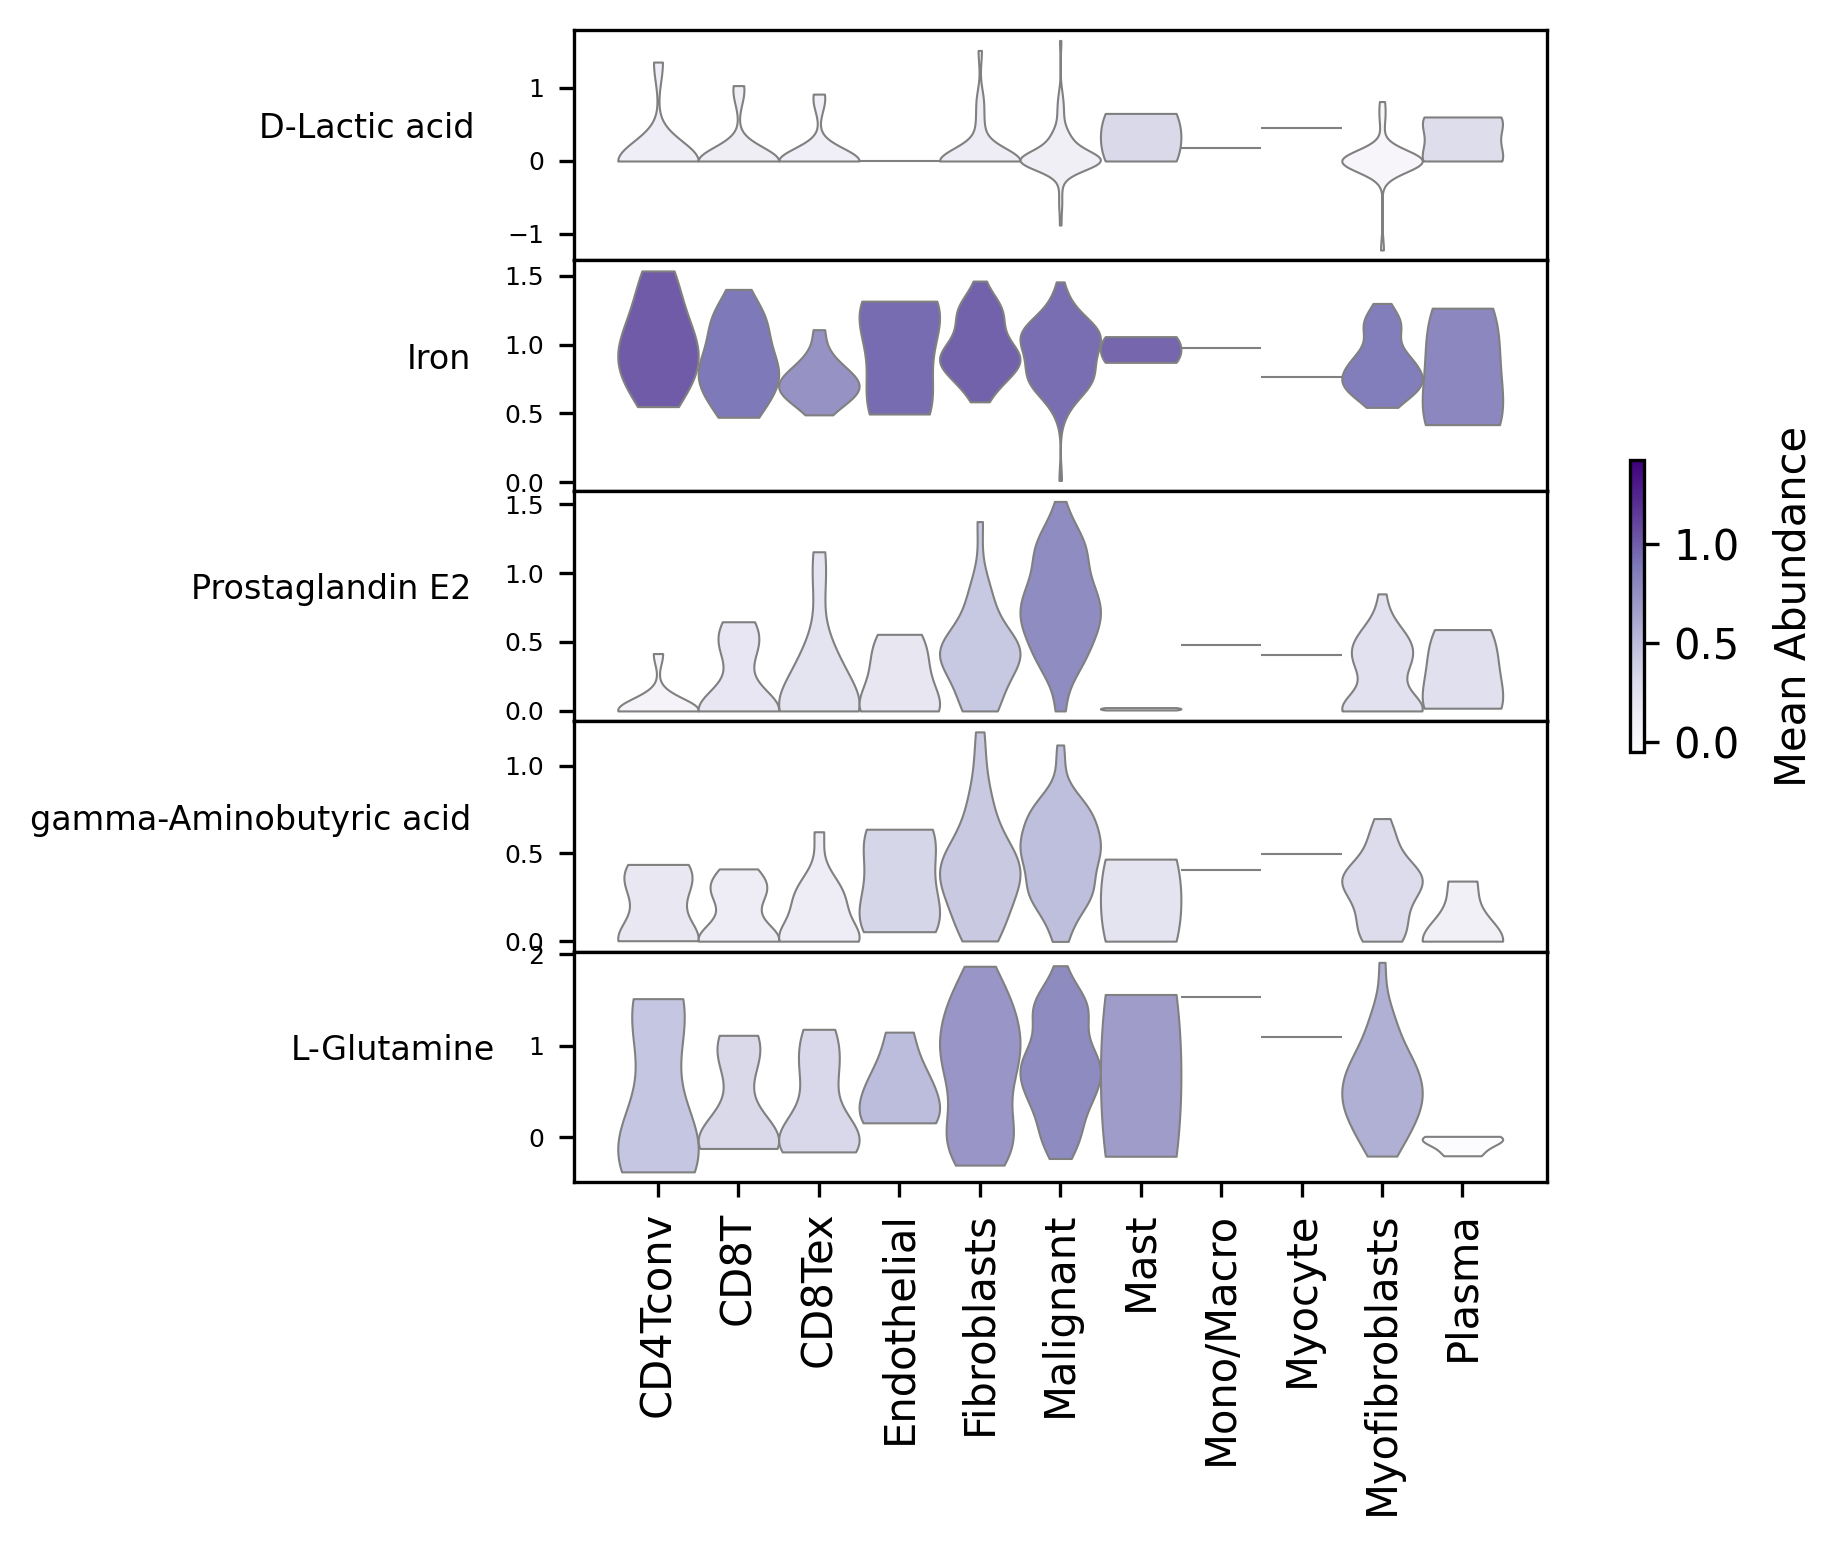

In [16]:
## violin plot to show the estimated metabolite abundance of informative metabolties in communication
### here we show five significant metabolites,
### users can pass several metabolites of interest by provide a list
commu_df = mebo_obj.commu_res.copy()
good_met = commu_df[(commu_df['permutation_test_fdr']<=0.05)]['Metabolite_Name'].unique()

mebo_obj.violin_plot(
                    sensor_or_met=good_met[:5],
                    cell_focus=[],
                    cmap=None,
                    vmin=None,
                    vmax=None,
                    figsize='auto',
                    cbar_title='',
                    save=None,
                    show_plot=True
                    )


[June 01, 2022 12:47:21]: Find genes Index(['SLC3A2', 'SLC40A1', 'SLC22A1', 'SLC16A1', 'SLC7A5'], dtype='object') to plot violin


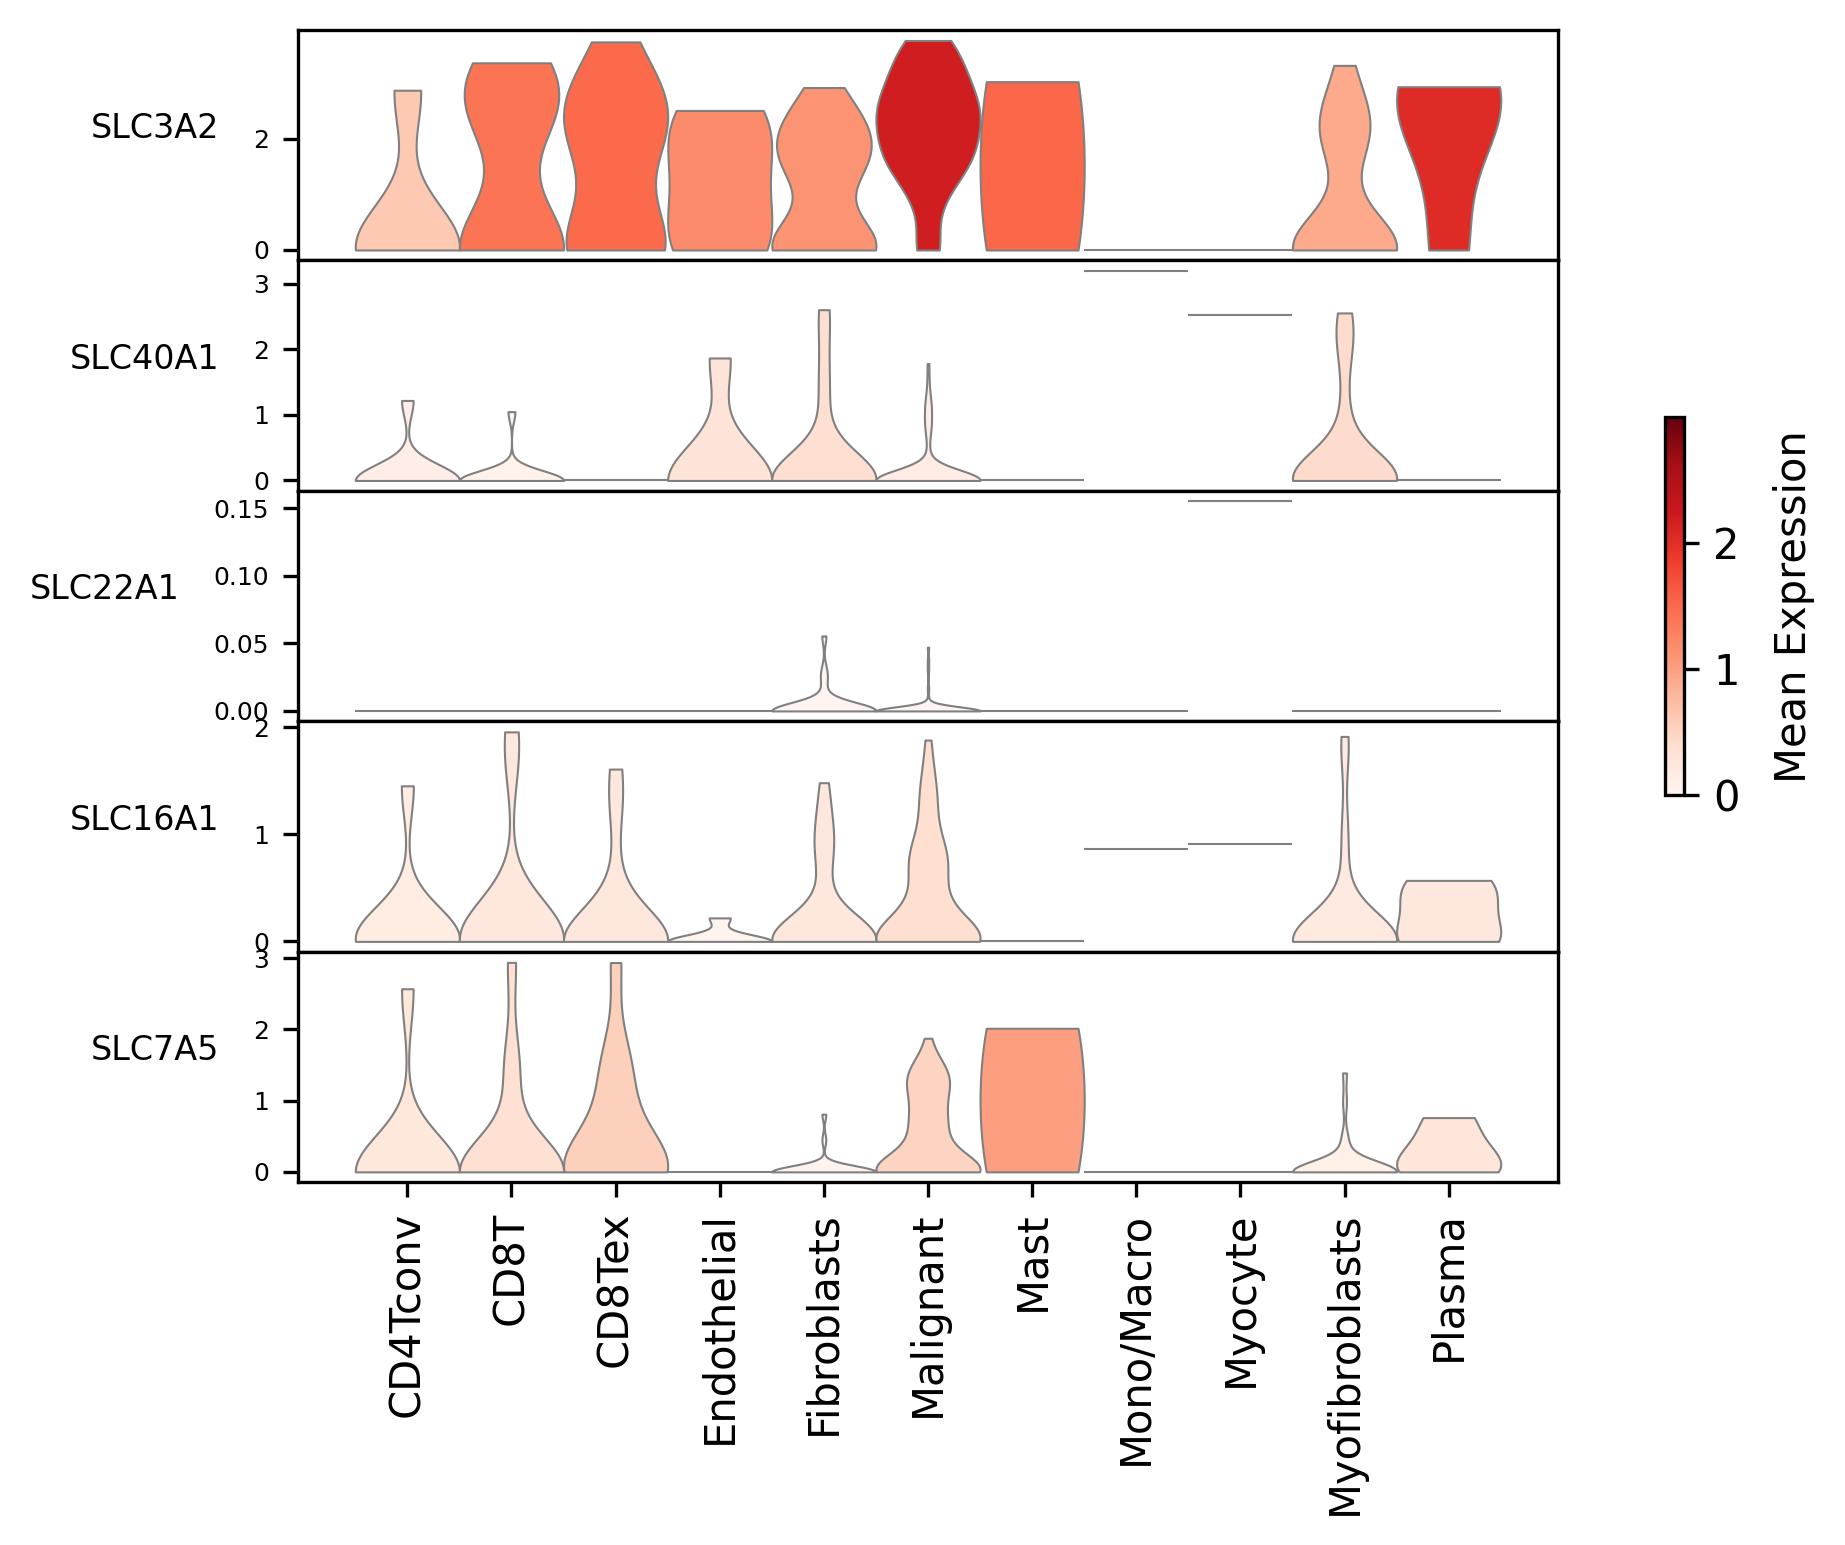

[June 01, 2022 12:47:21]: Warnings: no metabolites to plot


In [17]:
## violin plot to show the expression of informative sensors in communication

good_sensor = commu_df[(commu_df['permutation_test_fdr']<=0.05)]['Sensor'].unique()

mebo_obj.violin_plot(
                    sensor_or_met=good_sensor[:5],
                    cell_focus=[],
                    cmap=None,
                    vmin=None,
                    vmax=None,
                    figsize='auto',
                    cbar_title='',
                    save=None,
                    show_plot=True
                    )


### 2.6 extract data and save figures


#### 2.6.1 extract communication and write to a table:


In [18]:
### the updated and tidy communication result is in object, can be retreved by:
commu_res = mebo_obj.commu_res.copy()
## filter by FDR less than 0.05
commu_res = commu_res[commu_res['permutation_test_fdr']<=0.05]
## write to tsv file
commu_res.to_csv('communication_result.tsv', sep = '\t', index = None)


#### 2.6.2 save figures
<p>Users can save figures by either providing by parameter 'save' for each plotting function, or save figure separately by hand, in this case, users need to set 'return_fig = True'</p>

###### Method 1: a example for providing filename by parameter


In [21]:
mebo_obj.eventnum_bar(sender_focus=[],
    metabolite_focus=[],
    sensor_focus=[],
    receiver_focus=[],
    and_or='and',
    pval_method='permutation_test_fdr',
    pval_cutoff=0.05,
    comm_score_col='Commu_Score',
    comm_score_cutoff=0.1,
    cutoff_prop=None,
    figsize='auto',
    ## Note that filename passed by save parameter:
    save='mebocost_eventnum.pdf',
    show_plot=False,
    include=['sender-receiver', 'sensor', 'metabolite', 'metabolite-sensor'],
    group_by_cell=True,
    colorcmap='tab20',
    return_fig=False)



###### Method 2: a example for saving figures separately


In [24]:
fig = mebo_obj.eventnum_bar(sender_focus=[],
    metabolite_focus=[],
    sensor_focus=[],
    receiver_focus=[],
    and_or='and',
    pval_method='permutation_test_fdr',
    pval_cutoff=0.05,
    comm_score_col='Commu_Score',
    comm_score_cutoff=0.1,
    cutoff_prop=None,
    figsize='auto',
    save=None,
    show_plot=False,
    include=['sender-receiver', 'sensor', 'metabolite', 'metabolite-sensor'],
    group_by_cell=True,
    colorcmap='tab20',
    return_fig=True)
## save figure
fig.savefig('mebocost_eventnum.pdf')


### 2.7 Interactive visualization of communications
<p>To provide a user-friendly visualization of mebocost result, especially for those datasets with large number of communication events, notebook interactive view shed lights in. We developed the Jupyter interactive widgets to mimic webpage.
NOTE: this function can only be used in Jupyter notebook</p> 

In [ ]:
## here, users can click and plot figures

## interactive view module mimic a website but all go with our default parameters

mebo_obj.communication_in_notebook(pval_method='permutation_test_fdr',
                                    pval_cutoff=0.05,
                                    comm_score_col='Commu_Score',
                                    comm_score_cutoff=None,
                                    cutoff_prop=None)
